<h1><center>DATA DIRI</center></h1>



**Sahrudin Fiqri Muzahidat**
**NIM : 22106024**

![an image](https://img.icons8.com/material-two-tone/2x/incoming-call.png)
*085695036046*

link dataset : https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git

<h2><center>TUMOR OTAK (KESEHATAN)</center></h2>


In [ ]:
# Mengimport Library yang digunakan
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mendownlad dataset dari Kaggle dan dikirim ke dalam Github

In [ ]:
!wget https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/refs/heads/master.zip

--2024-05-07 04:21:29--  https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/zip/refs/heads/master [following]
--2024-05-07 04:21:29--  https://codeload.github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [             <=>    ]  86.97M  32.0MB/s    in 2.7s    

2024-05-07 04:21:32 (32.0 MB/s) - ‘master.zip’ saved [91198591]



In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 21.93 MiB/s, done.
Updating files: 100% (3264/3264), done.


Ekstrak code yang sudah di download tadi, dan masukan kedalam folder

In [ ]:
import zipfile,os,shutil

Kode os.listdir("/content/Brain-Tumor-Classification-DataSet") adalah perintah dalam bahasa pemrograman Python yang menggunakan modul os untuk mengakses direktori di sistem file. Dalam hal ini, itu mencoba membaca isi dari direktori yang disebutkan, yaitu "/content/Brain-Tumor-Classification-DataSet".

In [ ]:
os.listdir("/content/Brain-Tumor-Classification-DataSet")

['.git', 'Training', 'Testing']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/Brain-Tumor-Classification-DataSet'):
    for filename in filenames:
      print(os.path.join(dirname, filename))

/content/Brain-Tumor-Classification-DataSet/.git/index
/content/Brain-Tumor-Classification-DataSet/.git/config
/content/Brain-Tumor-Classification-DataSet/.git/description
/content/Brain-Tumor-Classification-DataSet/.git/HEAD
/content/Brain-Tumor-Classification-DataSet/.git/packed-refs
/content/Brain-Tumor-Classification-DataSet/.git/info/exclude
/content/Brain-Tumor-Classification-DataSet/.git/hooks/pre-rebase.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/push-to-checkout.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/pre-commit.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/commit-msg.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/update.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/pre-push.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/fsmonitor-watchman.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/pre-applypatch.sample
/content/Brain-Tumor-Classification-DataSet/.git/hooks/

**from tensorflow.keras.preprocessing.image import ImageDataGenerato**r: Mengimpor kelas ImageDataGenerator dari modul preprocessing.image di TensorFlow Keras untuk augmentasi data gambar.
**import pandas as pd**: Mengimpor pustaka pandas untuk manipulasi dan analisis data.
**import seaborn as sns:** Mengimpor modul Seaborn untuk visualisasi data statistik yang lebih menarik.
**from warnings import filterwarnings:** Mengimpor fungsi filterwarnings dari modul warnings untuk mengelola tampilan peringatan.

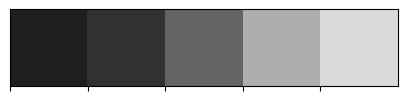

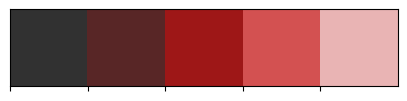

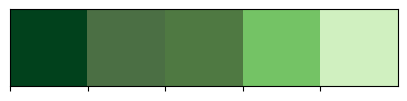

In [ ]:
colors_dark = ["#1F1F1F", "#313131", "#636363", "#AEAEAE", "#DADADA"]
colors_red = ["#313131", "#582626", "#9E1717", "#D35151", "#E9B4B4"]
colors_green = ['#01411C', '#4B6F44', '#4F7942', '#74C365', '#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_green)

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

pelabelan dari dataset yang sudah di download
0. glioma_tumor
1. no_tumor
2. meningioma_tumor
3. pituitary_tumor

In [ ]:
labels[1] #contoh hasil sesuai index

'no_tumor'

In [ ]:
x_train = [] #Membuat  list kosong untuk menyimpan data gambar dan labelnya.
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../content/Brain-Tumor-Classification-DataSet','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/Brain-Tumor-Classification-DataSet','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train) #Mengubah list gambar dan label menjadi array numpy untuk digunakan dalam pelatihan model

100%|██████████| 74/74 [00:00<00:00, 183.29it/s]


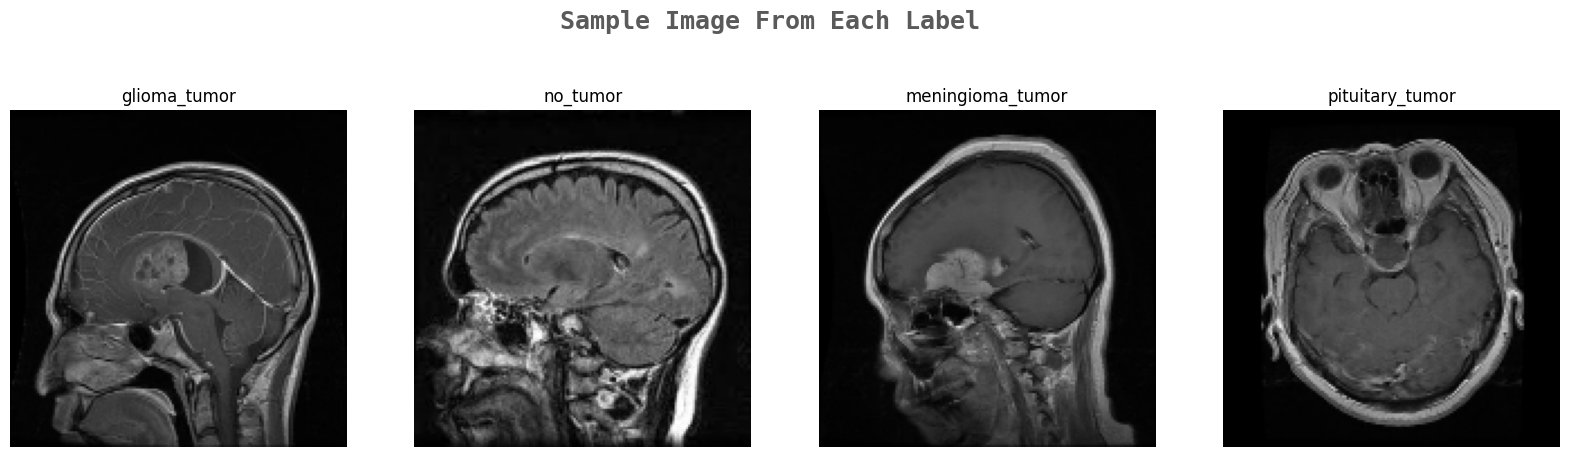

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
         fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
  j=0
  while True :
    if y_train[j]==i:
      ax[k].imshow(x_train[j])
      ax[k].set_title(y_train[j])
      ax[k].axis('off')
      k+=1
      break
    j+=1

  # Membuat subplot dengan 1 baris dan 4 kolom, dengan ukuran total gambar (figsize) 20x20. Variabel fig menyimpan objek gambar utama, sedangkan ax adalah array yang berisi sumbu-sumbu untuk setiap subplot

In [ ]:
x_train, y_train = shuffle(x_train,y_train, random_state=101)
x_train.shape

(3264, 150, 150, 3)

In [ ]:
#Membuat objek ImageDataGenerator yang digunakan untuk augmentasi data.
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)
#datagen.fit(x_train): Menggunakan metode fit() dari ImageDataGenerator untuk menyesuaikan generator dengan data. Ini digunakan untuk menghitung statistik internal yang diperlukan untuk augmentasi data, seperti mean dan std deviasi.
x_train.shape
#x_train.shape: Mencetak bentuk dari x_train, yaitu dimensi array gambar pelatihan.

(3264, 150, 150, 3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Membuat model Sequential, yang merupakan tumpukan linear layer. Model ini mengatur layer dalam urutan linear.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

**EfficientNetB0**: Ini adalah model EfficientNetB0 yang disediakan oleh TensorFlow Keras. Model ini merupakan bagian dari keluarga model EfficientNet yang dikenal karena efisiensinya dalam penggunaan sumber daya komputasi dan performanya dalam tugas-tugas penglihatan komputer.
**EfficientNetB0** adalah salah satu jenis arsitektur jaringan saraf tiruan (JST) yang didasarkan pada arsitektur **Convolutional Neural Network (CNN)**

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = effnet.output #Mengambil output dari model EfficientNetB0.
model = tf.keras.layers.GlobalAveragePooling2D()(model) # Menambahkan layer Global Average Pooling 2D untuk mengubah tensor 4D menjadi vektor 1D dengan melakukan operasi rata-rata pada setiap fitur spasial.
model = tf.keras.layers.Dropout(rate=0.5)(model) # Menambahkan layer Dropout untuk mencegah overfitting dengan mematikan sebagian neuron secara acak selama pelatihan.
model = tf.keras.layers.Dense(4,activation='softmax')(model) #Menambahkan layer Dense dengan 4 unit (sesuai dengan jumlah kelas) dan fungsi aktivasi softmax untuk menghasilkan probabilitas kelas output.
model = tf.keras.models.Model(inputs=effnet.input, outputs = model) #Membuat model baru dengan menggunakan input dari model EfficientNetB0 dan output dari transformasi yang dilakukan pada langkah-langkah sebelumnya.

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'Adam', metrics= ['accuracy'])

#model.compile: Metode compile() digunakan untuk mengonfigurasi proses pelatihan model sebelum model tersebut dapat dilatih.
# loss='categorical_crossentropy': Argumen loss menentukan fungsi kerugian yang akan digunakan selama pelatihan. Dalam hal ini, 'categorical_crossentropy' dipilih karena ini adalah fungsi kerugian umum yang digunakan dalam klasifikasi multikelas.
# optimizer='Adam': Argumen optimizer menentukan algoritma optimasi yang akan digunakan untuk menyesuaikan bobot model berdasarkan gradien dari fungsi kerugian. Di sini, kita menggunakan optimizer 'Adam', yang merupakan optimizer yang populer dan efisien.
# metrics=['accuracy']: Argumen metrics menentukan metrik yang akan digunakan untuk mengevaluasi kinerja model selama dan setelah pelatihan. Dalam hal ini, kita tertarik pada metrik akurasi, yang mengukur proporsi prediksi yang benar dari semua prediksi.

In [ ]:
tensorboard = TensorBoard(log_dir= 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor= 'val_accuracy', factor= 0.3, patience= 2, min_delta= 0.001,
                              mode='auto',verbose=1)

# Callback ini digunakan untuk menyimpan model dengan kinerja terbaik selama pelatihan.
# "effnet.h5" adalah nama file untuk menyimpan model.
# monitor="val_accuracy" menandakan bahwa model akan disimpan berdasarkan metrik validasi akurasi.
# save_best_only=True memastikan bahwa hanya model dengan kinerja terbaik yang akan disimpan.
# mode="auto" memastikan bahwa model terbaik adalah model dengan metrik yang lebih tinggi.
# verbose=1 membuat output yang informatif saat model disimpan.

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.1, epochs=12, verbose=1, batch_size=32,
                    callbacks=[tensorboard,checkpoint,reduce_lr])
#x_train adalah array yang berisi sampel gambar pelatihan.
#y_train adalah array yang berisi label kelas yang sesuai dengan setiap sampel gambar.
# validation_split=0.1 menentukan proporsi data yang akan digunakan untuk validasi. Dalam hal ini, 10% dari data pelatihan akan digunakan sebagai data validasi atau 90:10.
# epochs=12 menentukan jumlah epochs (putaran pelatihan) yang akan dilakukan.
# verbose=1 menentukan level verbosity yang menunjukkan progres pelatihan. Di sini, setiap epoch akan menampilkan progresnya.
# batch_size=32 menentukan ukuran batch yang akan digunakan selama pelatihan.
# callbacks=[tensorboard, checkpoint, reduce_lr] adalah daftar callback yang akan digunakan selama pelatihan untuk menyimpan log TensorBoard, menyimpan model terbaik, dan menyesuaikan laju pembelajaran jika diperlukan.

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8169
Epoch 1: val_accuracy improved from -inf to 0.79252, saving model to effnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 59s 219ms/step - loss: 0.4850 - accuracy: 0.8169 - val_loss: 0.9444 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.1829 - accuracy: 0.9353
Epoch 2: val_accuracy improved from 0.79252 to 0.93197, saving model to effnet.h5
83/83 [==============================] - 12s 139ms/step - loss: 0.1829 - accuracy: 0.9353 - val_loss: 0.2254 - val_accuracy: 0.9320 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.9637
Epoch 3: val_accuracy did not improve from 0.93197
83/83 [==============================] - 11s 131ms/step - loss: 0.1035 - accuracy: 0.9637 - val_loss: 0.2918 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 4/12
83/83 [==============================] - ETA: 0s - loss: 0.1016 - accuracy: 0.9648
Epoch 4: val_accuracy did not improve from 0.93197

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
83/83 [===============

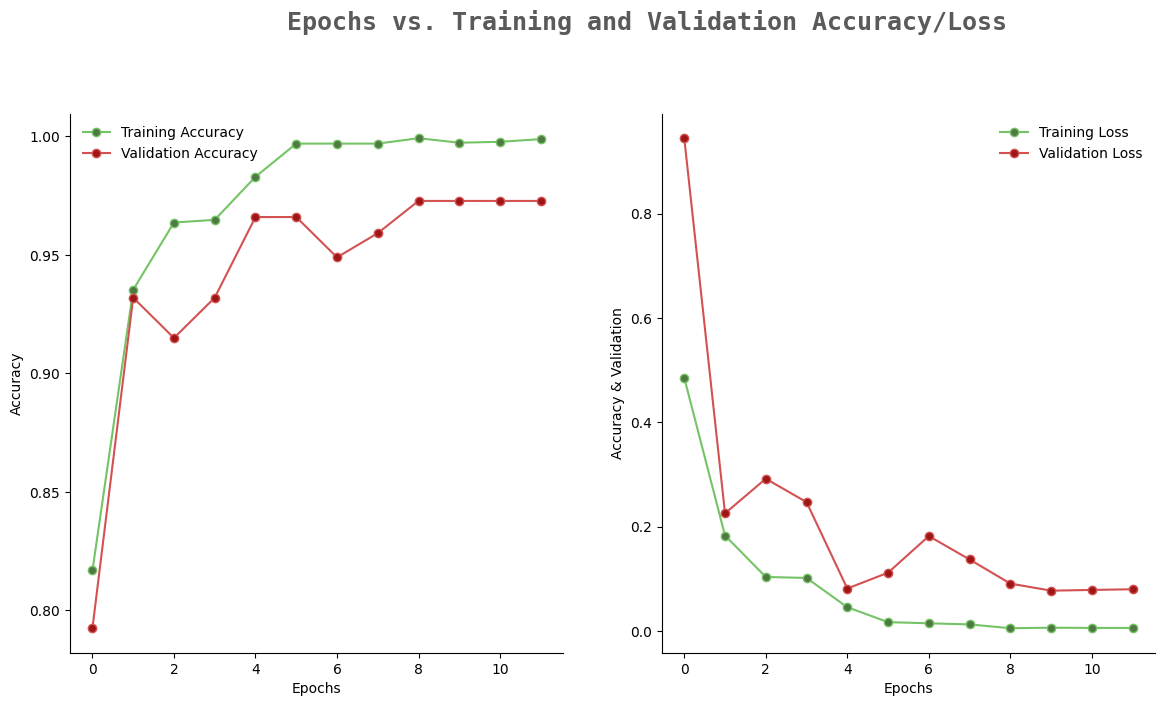

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18,fontweight='bold',
         fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy & Validation')

fig.show() #Menampilkan gambar yang berisi subplot-subplot yang telah dibuat.

# epochs = [i for i in range(12)]: Membuat daftar yang berisi nomor epoch dari 0 hingga 11.
# fig, ax = plt.subplots(1,2,figsize=(14,7)): Membuat sebuah gambar (figure) dengan satu baris dan dua kolom subplot. Variabel ax adalah array yang berisi sumbu-sumbu untuk masing-masing subplot.

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 3s 124ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       1.00      1.00      1.00        51
           2       0.97      0.97      0.97        96
           3       1.00      0.99      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



**Precisio**n: Precision adalah rasio dari jumlah prediksi positif yang benar (true positive) dibandingkan dengan total jumlah prediksi positif yang dibuat oleh model. Dalam kata lain, precision mengukur seberapa baik model dalam memprediksi kelas positif dengan tepat. Precision dapat dihitung dengan rumus:
Precision
=
True Positive
True Positive
+
False Positive
Precision=
True Positive+False Positive
True Positive
​

**Recall**: Recall (juga dikenal sebagai sensitivitas) adalah rasio dari jumlah prediksi positif yang benar (true positive) dibandingkan dengan total jumlah sampel yang sebenarnya positif dalam dataset. Recall mengukur seberapa baik model dapat mengidentifikasi semua contoh dari kelas positif. Recall dapat dihitung dengan rumus:
Recall
=
True Positive
True Positive
+
False Negative
Recall=
True Positive+False Negative
True Positive
​

**F1-scor**e: F1-score adalah ukuran gabungan dari precision dan recall yang menggambarkan keseimbangan antara kedua metrik tersebut. F1-score adalah rata-rata harmonik dari precision dan recall. F1-score memberikan nilai tunggal yang mencerminkan kualitas keseluruhan dari model klasifikasi. F1-score dapat dihitung dengan rumus:
F1-score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1-score=2×
Precision+Recall
Precision×Recall
​

**Support**: Support adalah jumlah sampel dalam dataset yang benar-benar termasuk dalam kelas tertentu. Support memberikan informasi tentang seberapa umum kelas tersebut dalam dataset.

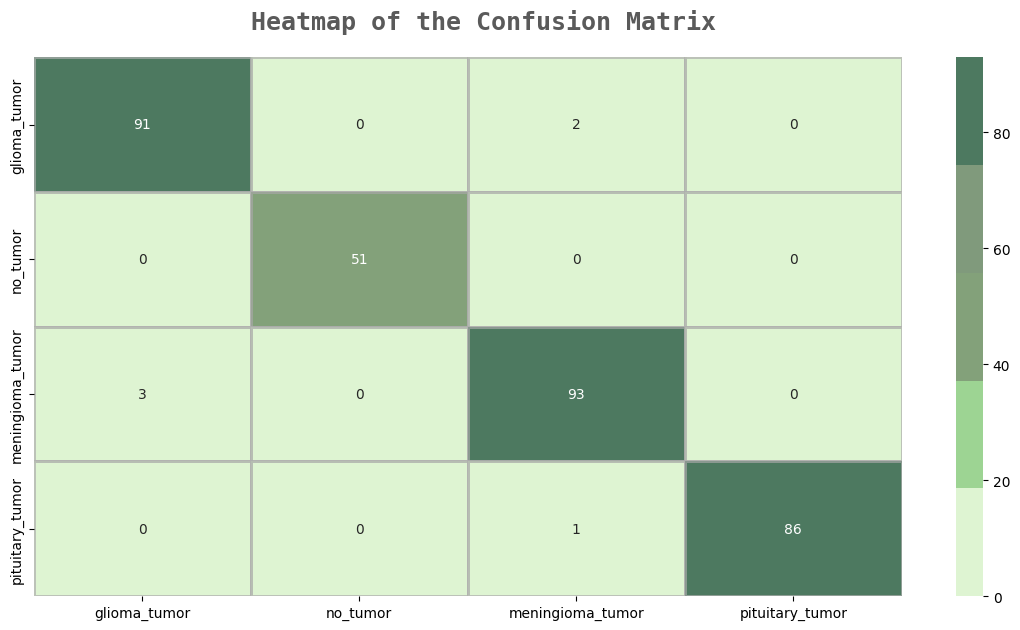

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7)) #Membuat sebuah gambar (figure) dengan satu subplot. Variabel ax adalah sumbu yang akan digunakan untuk plot heatmap.
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3]) #Menggambar heatmap dari confusion matrix menggunakan seaborn.
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8) #Menambahkan teks di atas heatmap sebagai judul.

plt.show()

Saving image(1).jpg to image(1) (5).jpg
1/1 [==============================] - 0s 55ms/step


array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

Hasil Prediksinya adalah : glioma_tumor


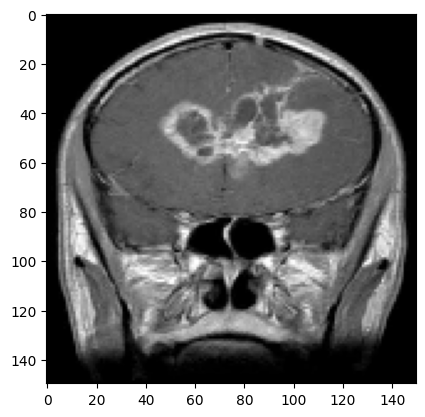

In [ ]:
# Upload an gambar
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()
for hasil in uploaded.keys():

  path = hasil
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

# muat gambar
image_path = next(iter(uploaded))
img = Image.open(image_path)

# preprocessing gambar
img = img.resize((image_size, image_size))
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

# membuat prediction
pred = model.predict(images)
pred = np.argmax(pred, axis=1)

# Display the uploaded image
display(images)




# menampilkan predicted label

print("Hasil Prediksinya adalah :", labels[pred[0]])